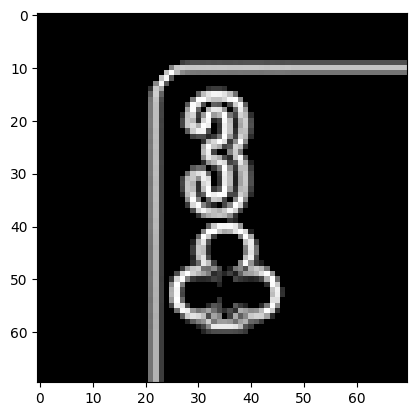

1/1 [==============================] - 0s 134ms/step
h
3


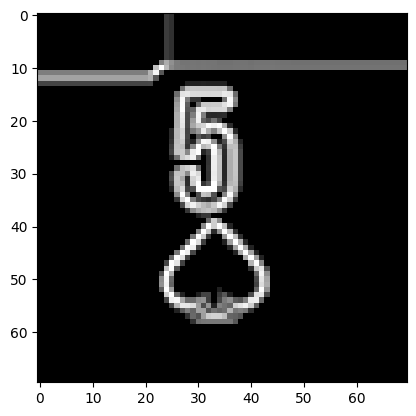

1/1 [==============================] - 0s 28ms/step
d
5


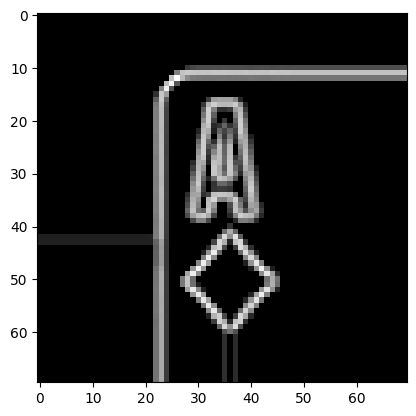

1/1 [==============================] - 0s 51ms/step
d
3


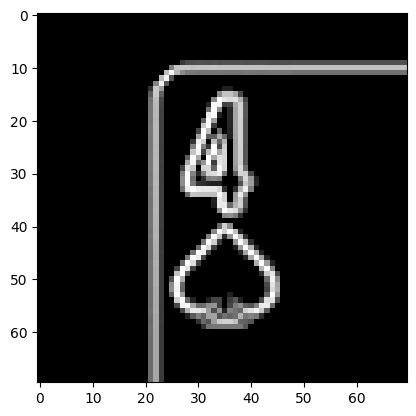

1/1 [==============================] - 0s 26ms/step
d
6


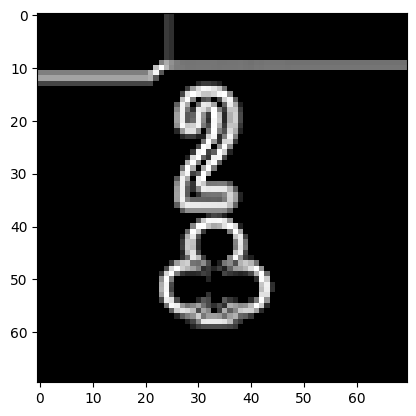

1/1 [==============================] - 0s 21ms/step
d
3


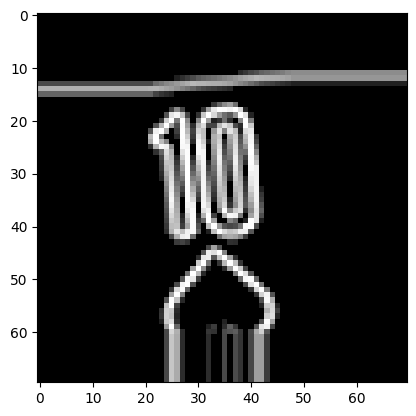

1/1 [==============================] - 0s 25ms/step
c
T


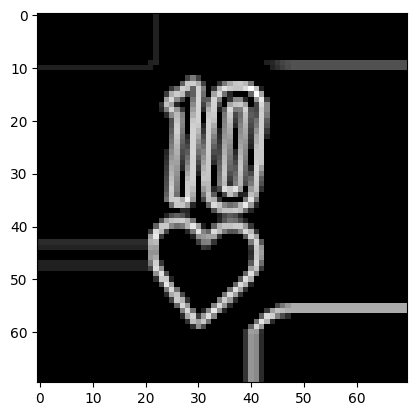

1/1 [==============================] - 0s 24ms/step
h
T


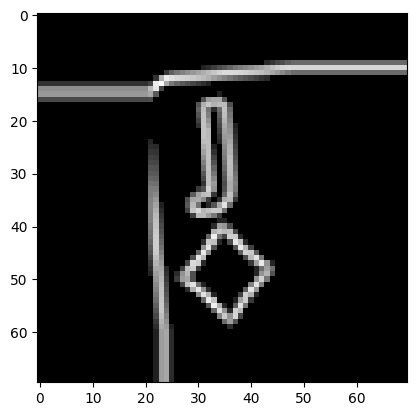

1/1 [==============================] - 0s 29ms/step
d
J


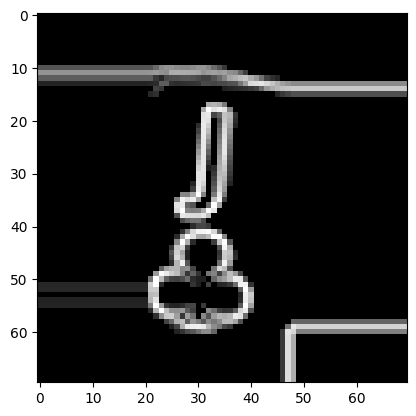

1/1 [==============================] - 0s 31ms/step
d
4


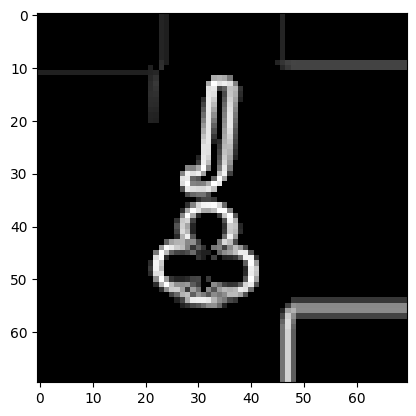

1/1 [==============================] - 0s 26ms/step
d
4


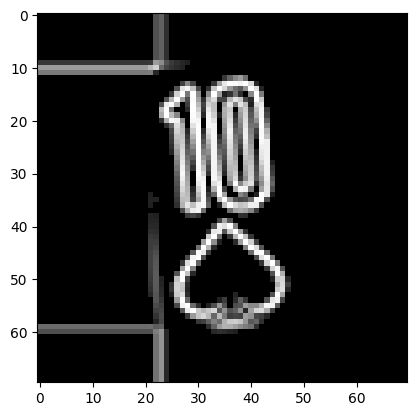

1/1 [==============================] - 0s 21ms/step
d
T


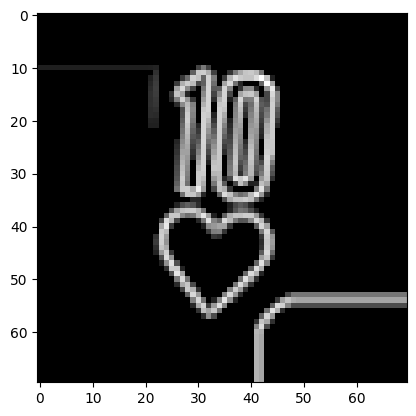

1/1 [==============================] - 0s 25ms/step
h
T


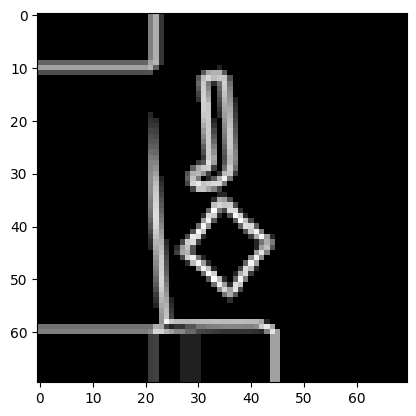

1/1 [==============================] - 0s 90ms/step
d
J


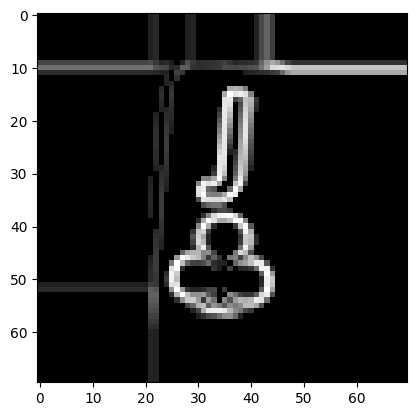

1/1 [==============================] - 0s 26ms/step
d
J


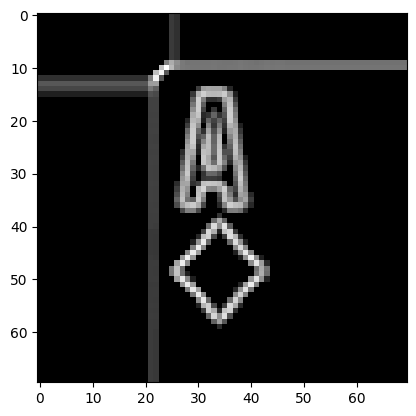

1/1 [==============================] - 0s 37ms/step
d
A


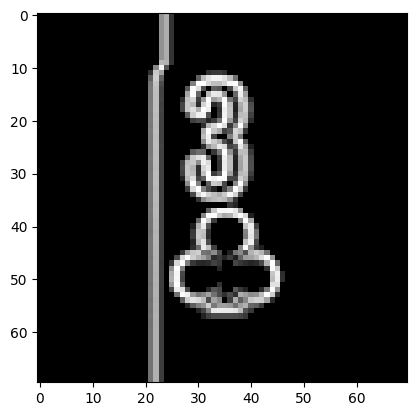

1/1 [==============================] - 0s 29ms/step
h
3


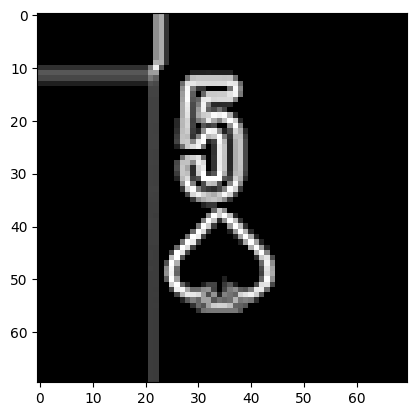

1/1 [==============================] - 0s 25ms/step
s
5


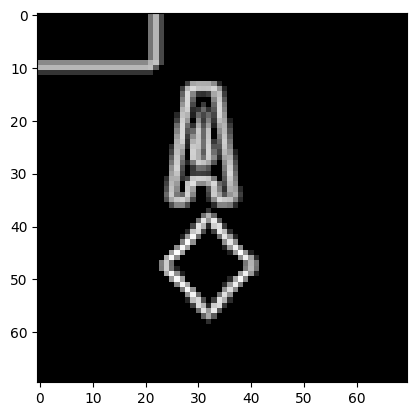

1/1 [==============================] - 0s 20ms/step
d
A


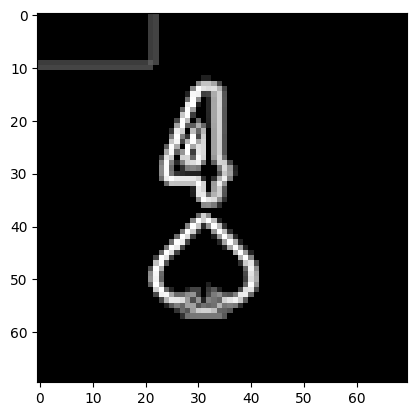

1/1 [==============================] - 0s 21ms/step
s
5


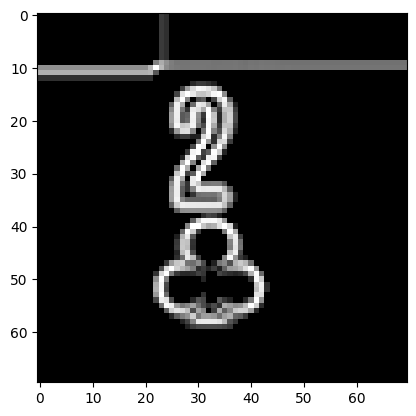

1/1 [==============================] - 0s 26ms/step
d
3


In [16]:
import tkinter as tk
from tkinter import filedialog
from PIL import ImageGrab, ImageTk,Image
import os
import numpy as np
from datetime import datetime
import cv2
from keras.models import load_model
import matplotlib.pyplot as plt

class ScreenshotTool:
    def __init__(self, master):
        self.master = master
        self.master.title("自動截圖工具")

        # Frame 1: 公牌截圖按鈕及顯示區域
        self.board_frame = tk.Frame(self.master)
        self.board_frame.grid(row=0, column=0, padx=10, pady=10)

        self.select_board_points_button = tk.Button(self.board_frame, text="選擇公牌截圖範圍", command=self.start_board_select_points)
        self.select_board_points_button.grid(row=0, column=0, padx=5)

        self.board_image_frame = tk.Frame(self.board_frame)
        self.board_image_frame.grid(row=1, column=0)

        self.board_image_label_list = []
        for i in range(5):
            self.board_image_label = tk.Label(self.board_image_frame)
            self.board_image_label.grid(row=0, column=i, padx=5)  # 橫向排列
            self.board_image_label_list.append(self.board_image_label)

        # Frame 2: 手牌截圖按鈕及顯示區域
        self.hand_frame = tk.Frame(self.master)
        self.hand_frame.grid(row=1, column=0, padx=10, pady=10)

        self.select_hand_points_button = tk.Button(self.hand_frame, text="選擇手牌截圖範圍", command=self.start_hand_select_points)
        self.select_hand_points_button.grid(row=0, column=0, padx=5)

        self.hand_image_frame = tk.Frame(self.hand_frame)
        self.hand_image_frame.grid(row=1, column=0)

        self.hand_image_label_list = []
        for i in range(2):
            self.hand_image_label = tk.Label(self.hand_image_frame)
            self.hand_image_label.grid(row=0, column=i, padx=5)  # 橫向排列
            self.hand_image_label_list.append(self.hand_image_label)


        self.identfier_frame = tk.Frame(self.master)
        self.identfier_frame.grid(row=2, column=0, padx=10, pady=10)

        self.identfier_button = tk.Button(self.identfier_frame, text="辨識牌", command=self.card_identfier)
        self.identfier_button.grid(row=1, column=0, padx=5)

        # 儲存選擇的五個點的座標
        self.board_points = []
        self.hand_points = []
        self.numbermodel = load_model('NumberCNN.keras')
        self.suitesmodel = load_model('SuitesCNN.keras')
        self.suites = 'shdc'
        self.number = 'A23456789TJQK'

    def card_identfier(self):

        for i in self.board_card_array:
            # print(i)
            plt.imshow(i,cmap='gray')
            plt.show()
            i = i.astype('float32')/255.
            i = i.reshape(-1,70,70,1)
            suites_pred = self.suitesmodel.predict(i)
            number_pred = self.numbermodel.predict(i)
            print(self.suites[suites_pred[0].argmax()])
            print(self.number[number_pred[0].argmax()])

            # print(self.categories[self.model.predict(i.reshape(-1, 70, 70, 1)).argmax()])
            

    def start_board_select_points(self):
        # 開始選擇五個點
        self.master.update()
        points = self.get_selected_points()
        self.points = points

        # 顯示截圖
        screenshot = self.get_screenshot()
        self.show_board_screenshot(screenshot)

    def start_hand_select_points(self):
        # 開始選擇五個點
        self.master.update()
        points = self.get_selected_points()
        self.points = points

        # 顯示截圖
        screenshot = self.get_screenshot()
        self.show_hand_screenshot(screenshot)

    def get_selected_points(self):
        # 使用OpenCV擷取點的位置
        ImageGrab.grab(all_screens=True).save("tmp.jpg")
        img = cv2.imread('tmp.jpg')

        points = []
        def get_point(event, x, y, flags, param):
            nonlocal points
            if event == cv2.EVENT_LBUTTONDOWN:
                points.append((x, y))
                cv2.rectangle(img, (x-14, y-26), (x+14, y+26), (255, 0, 0), 2)
                cv2.imshow('SelectPoints', img)

        cv2.namedWindow("SelectPoints", cv2.WINDOW_NORMAL)
        cv2.setWindowProperty("SelectPoints", cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
        cv2.imshow('SelectPoints', img)
        cv2.setMouseCallback('SelectPoints', get_point)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        return points

    def get_screenshot(self):
        # 根據選擇的五個點擷取截圖
        screenshot_list = []

        for i in self.points:
            screenshot = ImageGrab.grab(bbox=(i[0]-14, i[1]-26, i[0]+14, i[1]+26))
            

            # print(np.array(screenshot))
            gray = cv2.cvtColor(np.array(screenshot), cv2.COLOR_BGR2GRAY)
            # print(gray.shape)
            gray = cv2.copyMakeBorder(gray, 9, 9, 21, 21, cv2.BORDER_REPLICATE)
            # print(gray.shape)
            # 对灰度图应用 Sobel 边缘检测
            sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=1)
            sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=1)
            
            # 将 Sobel X 和 Sobel Y 合并为边缘强度图像
            edges = cv2.magnitude(sobelx, sobely)
            edges = cv2.convertScaleAbs(edges)

            edges = np.where(edges > 30, edges, 0)



            screenshot = Image.fromarray(edges)

            screenshot_list.append(screenshot)
        return screenshot_list

    #screenshot : img List
    def show_board_screenshot(self, screenshot):
        # 將截圖轉換為Tkinter PhotoImage格式
        self.board_card_array = []
        for i in range(5):
            screenshot_tk = ImageTk.PhotoImage(screenshot[i])
            self.board_card_array.append(np.array(screenshot[i]))

            # 在Label中顯示截圖

            self.board_image_label_list[i].config(image=screenshot_tk)
            self.board_image_label_list[i].image = screenshot_tk

    def show_hand_screenshot(self, screenshot):
        # 將截圖轉換為Tkinter PhotoImage格式
        self.hand_card_array = []
        for i in range(2):
            screenshot_tk = ImageTk.PhotoImage(screenshot[i])
            self.hand_card_array.append(np.array(screenshot[i]))
            # 在Label中顯示截圖

            self.hand_image_label_list[i].config(image=screenshot_tk)
            self.hand_image_label_list[i].image = screenshot_tk

if __name__ == "__main__":
    root = tk.Tk()
    app = ScreenshotTool(root)
    root.mainloop()


In [7]:
numbermodel = load_model('NumberCNN.keras')
suitesmodel = load_model('SuitesCNN.keras')

In [8]:
numbermodel.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 70, 70, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 35, 35, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 35, 35, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 35, 35, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 17, 17, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 17, 17, 64)       

: 